Fórmula de Bayes

https://onlinecourses.science.psu.edu/stat414/node/43

Verosimilitud

- Ejemplo: El problema de las urnas

- De urnas a lenguaje

- Ajuste de modelos (ver Gaussiana)

- Ajuste regresión lineal

# Verosimilitud estadística

## 1. Introducción al concepto de verosimilitud

### Definición. ¿Qué és la verositimilitud estadística?

* La verosimilitud es una función matemática cuya variable son los parámetros de un modelo estadístico. 

* En su expresión más simple, decimos que la verosimilitud (en inglés, *likelihood*) de que un modelo con parámetros $\theta$ haya generado un dato $x$ es: 

\begin{equation}
\mathcal{L}(\theta) = p(x|\theta)
\end{equation}



**Pregunta**. ¿Pero esto no era la "densidad de probabilidad"? 

**Aclaración**. 

* Decimos que $p(x|\theta)$ es una función de masa de probabilidad (para variables discretas) o densidad de probabilidad (para variables contínuas) cuando los parámetros del modelo $\theta$ están fijados y nos interesa realizar predicciones. 

* Si fijamos el dato $x$, y lo que nos interesa es estudiar la variación de $\theta$, entonces hablamos de verosimilitud. 

¿Por qué querríamos hacer esto? Ejemplos: 

* Dados unos datos, encontrar el modelo que mejor ajusta su distribución (el modelo más *verosímil*, de ahí la palabra). 

* Comparar dos o más modelos y determinar cuál es más plausible dados unos datos. 

### Verosimilitud de una muestra

La verosimilitud de un conjunto de datos $\mathcal{D} = {x_1, \ldots x_N}$ es

\begin{equation}
\mathcal{L}(\theta) = p(x_1|\theta)\times p(x_2|\theta)\times\ldots\times p(x_N|\theta) = \prod_{i=1}^N p(x_i|\theta).
\end{equation}

Nota. Explicar en pizarra la notación de $\theta$. 



## 2. Ejemplo de verosimilitud de una variable discreta. 

### Problema de las urnas

* Tenemos 4 urnas
* Cada urna tiene 4 bolas
* La primera tiene una bola blanca, la segunda dos bolas de color blanco, la tercera tres y la cuarta, cuatro. El resto de bolas es de color negro (excepto la cuarta donde ya vemos que todas son blancas). 

Las urnas están detrás de una cortina. Alguien escoge una urna y empieza a sacar bolas (cada vez que se extrae una bola, se vuelve a introducir en la urna). Nosotros no sabemos de qué urna las está sacando. 

Imaginemos que vemos esta secuencia de bolas: 

\begin{equation}
{\Large \bullet\quad\circ\quad\circ\quad\bullet\quad\bullet\quad\bullet\quad\bullet\quad\circ}
\end{equation}

Podemos ver cada extracción de cada i-ésima bola como una variable aleatoria (por ejemplo, $x_i$ = 1 si la bla es blanco, y si no $x_i$ = 0). 

Y la urna (que no conocemos) como 4 modelos diferentes (con diferentes parámetros). 

**Ejercicio.** Calcular la verosimilitud de cada urna para la secuencia de bolas extraídas. 

(Resolvemos en pizarra)

### Implementación

* Una urna se puede ver como un modelo con unos determinados parámetros. 

* Específicamente, un modelo que puede dar 1 con una cierta probabilidad $p$, y 0 con probabilidad $1-p$, se llama *distribución de Bernouilli*.

* Cada extracción de la urna se puede modelizar con una distribución de Bernouilli con un $p$ diferente. 

**Ejercicio.** Define una función de python que tome una secuencia de elementos bool y calcule la verosimilitud de una urna. 

In [1]:
def likelihood(seq, p_urn):
    
    product = 1
    
    for ball in seq: 
        if ball == True:
            product *= p_urn
        else:
            product *= 1 - p_urn
            
    return product

In [2]:
likelihood([False, True, True, False, False, False, False, True, False], 0.25)

0.002780914306640625

### Mismo código usando scipy.stats

In [3]:
from scipy.stats import bernoulli

def likelihood_stats(seq, p):
    
    product = 1.0
    distrib = bernoulli(p)
    
    for s in seq:
        product *= distrib.pmf(s)
        
    return product
    

In [4]:
likelihood_stats([False, True, True, False, False, False, False, True, False], 0.25)

0.002780914306640625

### Más compacto (usando vectorización)

In [6]:
import numpy as np
sequence = [False, True, True, False, False, False, False, True, False]
np.prod(bernoulli.pmf(sequence, 0.25))

0.002780914306640625

Observemos: 

* Cuando mayor sea este valor para una cierta urna, más creíble es que la secuencia ha sido generada por esa urna. 

* (Probar a dibujar la función de verosimilitud). 

* La verosimilitud no es una probabilidad! (Pero ahora veremos cómo se relaciona con ésta). 

### Función de verosimilitud

Text(0,0.5,'$\\mathcal{L}(p)$')

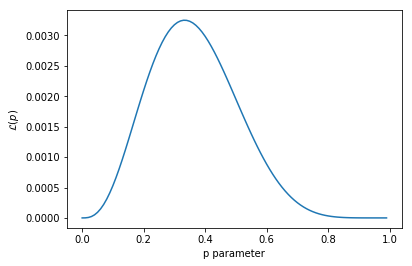

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
like = lambda p: np.prod(bernoulli.pmf([False, True, True, False, False, False, False, True, False], p)) 

x  = np.arange(0, 1, 0.01)
ls = [like(xi) for xi in x] 
plt.plot(x, ls)
plt.xlabel("p parameter")
plt.ylabel("$\mathcal{L}(p)$")

**Ejercicio.** Ahora, calcular la *probabilidad* (no verosimilitud) de que la urna escogida haya sido la 1, 2, 3 o 4. 

## 3. Caso práctico: Detección de lenguaje por frecuencias

* http://www.ravi.io/language-word-lengths

* https://github.com/akleemans/letter-frequency

In [11]:
import pandas as pd
freqs = pd.read_csv("letter_frequency.csv", sep=";")[['Letter', 'Spanish', 'French']]
freqs.head()

,Letter,Spanish,French
0,a,11.525%,7.636%
1,b,2.215%,0.901%
2,c,4.019%,3.260%
3,d,5.010%,3.669%
4,e,12.181%,14.715%


In [12]:
freqs['Spanish'] = freqs['Spanish'].str.rstrip('%').astype('float') / 100.0
freqs['French'] = freqs['French'].str.rstrip('%').astype('float') / 100.0
freqs.head()

,Letter,Spanish,French
0,a,0.11525,0.07636
1,b,0.02215,0.00901
2,c,0.04019,0.03260
3,d,0.05010,0.03669
4,e,0.12181,0.14715


**Ejercicio.** Verosimilitud de que una frase sea español o francés.

In [13]:
def like_lang(frase, lang):
    
    l = 1.0
    
    for c in frase.lower().replace(" ", ""): 
        pos = np.where(freqs['Letter'] == c)[0]
        l *= freqs.loc[pos, lang].values[0]
        
    return l
        

In [14]:
like_lang("jose antonio rodríguez serrano", 'French')

0.0

### Corrección con logaritmos

* El producto de una secuencia probabilidas es sencillo que rápidamente tienda a 0 conforme  la secuencia aumenta de longitud. 

* En casos el valor puede llega por debajo de la precisión de la variable que se esté usando (en este caso float64). 

* Para estos casos, una técnica habitual es, en lugar de multiplicar probabilidades, *sumar logaritmos de probabilidades (detallar en pizarra). 

In [15]:
def loglike_lang(frase, lang):
    
    l = 0.0
    
    for c in frase.lower().replace(" ", ""): 
        pos = np.where(freqs['Letter'] == c)[0]
        l += np.log(freqs.loc[pos, lang].values[0])
        
    return np.exp(l)

In [16]:
loglike_lang('hola qué tal estás y tú también y esto y lo otro', 'French')

C:\Users\Los3\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


0.0

(Explicar clasificador Naive Bayes en pizarra)

Material sobre Naïve Bayes: 

* [Documentación de `sklearn`](http://scikit-learn.org/stable/modules/naive_bayes.html)

* [Tutorial Naive Bayes del libro "Data Science in Python"](https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html)

## 4. Verosimilitud en Variables Contínuas

In [17]:
# Generamos un dataset

import numpy as np

N = 1000
mu = 3.
sigma = 1.5

y = np.random.normal(size=(1000), loc=138, scale=5)

In [18]:
y[:20]

array([137.02529382, 140.82327564, 133.36570362, 145.33332121,
       133.79582504, 140.60226384, 134.3869452 , 142.39872392,
       137.59584275, 130.87164348, 141.36911305, 142.54357852,
       135.75776198, 136.46941717, 136.44014654, 126.20885097,
       143.73277164, 135.21005958, 143.94633804, 135.84244273])

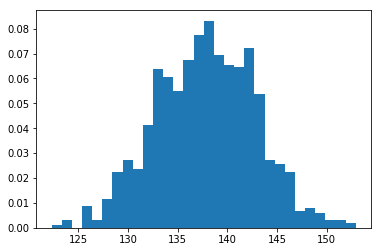

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
_ = plt.hist(y, 30, normed=True)

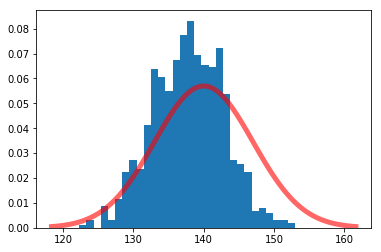

In [20]:
from scipy.stats import norm
_ = plt.hist(y, 30, normed=True)

gaussian = norm(loc=140, scale=7)
x = np.linspace(gaussian.ppf(.001), gaussian.ppf(.999), 100)

plt.plot(x, gaussian.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')


Verosimilitud de modelizar $y$ con una distribución Gaussiana $p(y|\theta) = p(y|\mu, \sigma)$. 

Aquí recordemos que la función de verosimilitud sería

\begin{equation}
\mathcal{L}(\mu, \sigma) = p(y_1|\mu, \sigma)\times p(y_2|\mu, \sigma) \times \ldots \times p(y_n|\mu, \sigma) = \prod_{i=1}^N p(y_i|\mu, \sigma) 
\end{equation}


### Implementación "ingenua"

In [21]:
def likelihood_naive(loc, scale, data):
    
    likelihood = 1.0
    for y in data:
        likelihood *= norm.pdf(y, loc, scale)
        
    return likelihood

In [22]:
likelihood_naive(140, 5, y[:10])

7.450617386960105e-14

Volvemos a necesitar el truco del logaritmo. 

\begin{equation}
\mathcal{L}(\mu, \sigma) = p(y_1|\mu, \sigma)\times p(y_2|\mu, \sigma) \times \ldots \times p(y_n|\mu, \sigma) = \prod_{i=1}^N p(y_i|\mu, \sigma) 
\end{equation}

\begin{equation}
\log \mathcal{L}(\mu, \sigma) = \log p(y_1|\mu, \sigma) + \log p(y_2|\mu, \sigma) + \ldots + \log p(y_n|\mu, \sigma) = \sum_{i=1}^N \log p(y_i|\mu, \sigma) 
\end{equation}


In [23]:
def log_likelihood(loc, scale, data):
    
    log_likelihood = 0.0
    for y in data:
        log_likelihood += np.log(norm.pdf(y, loc, scale))
        
    return log_likelihood

In [24]:
log_likelihood(150, 5, y)

-5998.633130166347

In [25]:
log_likelihood(3, 4, y)

-571073.9295736345

Notas

* Comparar por verosimilitud es equivalente a comparar por el logaritmo (porque la función logaritmo es monótona). 

* Para una distribucion Gaussiana $p(y|\mu, \sigma)$, los valores que dan máxima verosimilitud son: 

\begin{equation}
\mu = \frac{1}{N}(y_1 + \ldots + y_N) = \frac{1}{N}\sum_{i=1}^N y_i
\end{equation}

\begin{equation}
\sigma = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (y_i - \mu)^2}
\end{equation}

(Desarrollar en pizarra)

### Interactive visualization

In [26]:
from ipywidgets import *

def viz(mu, scale):
    plt.hist(y, 30, normed=True)
    gaussian = norm(mu, scale)
    x = np.linspace(gaussian.ppf(.001), gaussian.ppf(.999), 100)
    plt.plot(x, gaussian.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
    plt.title("$\log\mathcal{L}(\mu, \sigma) = $" + str(np.round(log_likelihood(mu, scale, y), 2)))
    plt.show()
    
interact(viz, mu=(130,160), scale=(1, 20))

interactive(children=(IntSlider(value=145, description='mu', max=160, min=130), IntSlider(value=10, description='scale', max=20, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.viz>

## 5. Caso práctico de estimación por máxima verosimilitud: regresión lineal

In [28]:
import pandas as pd

frm = pd.read_csv("../1-modeling/multiTimeline.csv", header=1)
frm.columns = ['date', 'FCB', 'RMA']
frm.head()

,date,FCB,RMA
0,2013-01-13,15,12
1,2013-01-20,15,15
2,2013-01-27,38,36
3,2013-02-03,13,13
4,2013-02-10,16,36


In [29]:
x = frm['FCB'].values
y = frm['RMA'].values

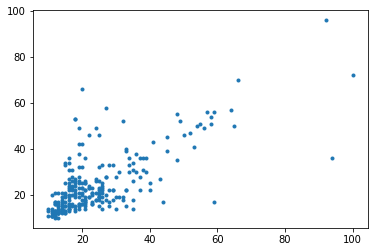

In [30]:
plt.plot(x, y, '.')

* Dados unos datos de pares $(x,y)$, podemos ver una regresión como una distribución Gaussiana donde la media de $y$ depende del valor de x. 

\begin{equation}
p(y|x,\mu \sigma) = \mathcal{N}(y; m x, \sigma) = \frac{1}{\sqrt{2\pi}\sigma}e^{\frac{(y-mx)^2}{2\sigma^2}}
\end{equation}

* Podemos preguntarnos: cuáles son la $m$ y $\sigma$ que mejor ajustan los datos? 

 * Una posible solución: ¿cuáles son la $m$ y $\sigma$ que dan lugar a la máxima verosimilitud? 

In [31]:
m = 1
sig = 10

def log_likelihood_regression(slope, scale, data):
    
    log_likelihood = 0.0
    for (x,y) in data:
        log_likelihood += np.log(norm.pdf(y, slope*x, scale))
        
    return log_likelihood

In [32]:
log_likelihood_regression(.92, 10, zip(x, y))

-971.5029624378661

In [33]:
def plot_regression(m, sig):

    plt.figure(figsize=(8,4))
    plt.plot(x,y, 'x', markersize=3)
    plt.plot([x.min(), x.max()], [m*x.min(), m*x.max()])
    plt.fill_between([x.min(), x.max()], 
                     [m*x.min()-sig, m*x.max()-sig],
                     [m*x.min()+sig, m*x.max()+sig],
                     alpha=0.3, 
                     facecolor='gray')
    plt.title(log_likelihood_regression(.92, 10, zip(x, y)))

interact(plot_regression, m=(0.1, 2, 0.05), sig=(1,20))

interactive(children=(FloatSlider(value=1.05, description='m', max=2.0, min=0.1, step=0.05), IntSlider(value=10, description='sig', max=20, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_regression>

## 6. Métodos para la estimación de máxima verosimilitud 

1.  Solución empírica: Escribimos un programa que explore el espacio de parámetros automáticamente (este programa se llama optimizador). 
2. Solución empírica: Aplicamos un optimizador existente. 
3. Solución analítica: Buscamos matemáticamente el punto óptimo de la función de verosimilitud. 

Empezamos por la opción 2: usando un optimizador existente. 

* La librería `scipy.optimize` contiene múltiples funciones para optimizar modelos. 

 * Algunas de ellas se usan en los métodos `fit()` de `sklearn`! 

In [34]:
data = np.vstack((x, y)).T

def my_objective(params):
    
    log_likelihood = 0.0
    for row in data: 
        log_likelihood += np.log(norm.pdf(row[1], params[0]*row[0], params[1]))
        
    return -log_likelihood

In [35]:
my_objective([1, 10])

978.4676664378665

In [36]:
from scipy.optimize import minimize

solution = minimize(my_objective, [1, 10])

In [37]:
solution

      fun: 971.4939068098786
 hess_inv: array([[0.00071807, 0.00203215],
       [0.00203215, 0.00608763]])
      jac: array([-1.52587891e-05,  0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 271
      nit: 9
     njev: 65
   status: 2
  success: False
        x: array([ 0.91702984, 10.00675343])

In [38]:
def my_objective2(params):
    
    log_likelihood = 0.0
    for row in data: 
        log_likelihood += np.log(norm.pdf(row[1], params[2] + params[0]*row[0], params[1]))
        
    return -log_likelihood

In [39]:
minimize(my_objective2, [1, 10, 0])

      fun: 946.9222905269627
 hess_inv: array([[ 4.24467441e-04,  8.96435290e-05, -1.61082369e-04],
       [ 8.96435290e-05,  3.95072370e-05, -3.38863017e-04],
       [-1.61082369e-04, -3.38863017e-04,  4.93775139e-03]])
      jac: array([-4.57763672e-05,  2.28881836e-05,  7.62939453e-06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 301
      nit: 13
     njev: 59
   status: 2
  success: False
        x: array([0.65908246, 9.10765824, 8.29669942])

(Explicar en pizarra máxima verosimilitud)

In [40]:
sxy = np.sum(x*y)
sx2 = np.sum(np.square(x))

sxy / sx2

0.9170298564187105